## Hand-made Neural Network

### We define:

X: Features (input)
W: Neuron weights
b: bias

For each neuron:

$$X = \begin{bmatrix} x1 \\ x2 \\ \vdots \\ xn \end{bmatrix} \;\;\;\; W = \begin{bmatrix} w1 & w2 & \dots & wn \end{bmatrix} \;\;\;\; b=scalar$$

For each layer:

$$X = \begin{bmatrix} x1 \\ x2 \\ \vdots \\ xn \end{bmatrix} \;\;\;\; 
  W = \begin{bmatrix} w11 & w12 & \dots & w1n \\ w21 & w22 & \dots & w2n \\ \vdots & &\ddots &\vdots \\ wm1 & wm2 & \dots & wmn \end{bmatrix} \;\;\;\;
  b = \begin{bmatrix} b1 \\ b2 \\ \vdots \\ bm \end{bmatrix}$$
  
$$out = a(WX + b)$$

In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons


In [2]:
def flower_dataset(samples, maximum):
    np.random.seed(1)
    m = samples # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = maximum # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X
    Y = Y.reshape(m)

    return X, Y

def spiral_dataset(samples):
    N = samples//2
    theta = (np.sqrt(np.random.rand(N))*4*np.pi)

    r_a = 2*theta + np.pi
    data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
    x_a = (data_a + np.random.randn(N,2))/10

    r_b = -2*theta - np.pi
    data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
    x_b = (data_b + np.random.randn(N,2))/10

    res_a = np.append(x_a, np.zeros((N,1)), axis=1)
    res_b = np.append(x_b, np.ones((N,1)), axis=1)

    res = np.append(res_a, res_b, axis=0)
    np.random.shuffle(res)
    
#     plt.scatter(x_a[:,0],x_a[:,1])
#     plt.scatter(x_b[:,0],x_b[:,1])
#     plt.show()
    
    return res[:,0:2], res[:,2]


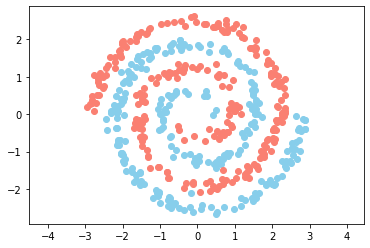

(2, 500) (1, 500)


In [3]:
samples = 500
features = 2

# X, Y = make_circles(n_samples = samples, factor = 0.5, noise = 0.05)
# X, Y = make_moons(n_samples = samples, noise=0.05, random_state=0)
# X, Y = flower_dataset(samples, 2)
X, Y = spiral_dataset(samples)

plt.scatter(X[Y==0,0], X[Y==0,1], c='skyblue')
plt.scatter(X[Y==1,0], X[Y==1,1], c='salmon')
plt.axis("equal")
plt.show()

# prepare the samples set and Y set
y_train = Y.reshape(1, samples)
x_train = X.T
# x_train = np.vstack((x_train, x_train))
print(x_train.shape, y_train.shape)

In [4]:
class Layer:
    def __init__(self, inputs, neurons, act):
        self.act = act
        self.b = (np.random.rand(neurons,1) * 2 - 1) * 1 
        self.w = (np.random.rand(neurons, inputs) * 2 - 1) * 1 #We want to start near zero


In [5]:
# Sanity check
neurons = 4
l = Layer(features, neurons, 1)
print("Test Layer:", neurons, "neurons", features, 'inputs')
print(l.b.shape, 'b = \n', l.b)
print(l.w.shape, 'W = \n', l.w)

Test Layer: 4 neurons 2 inputs
(4, 1) b = 
 [[ 0.33463657]
 [ 0.52184226]
 [-0.02776066]
 [ 0.40413019]]
(4, 2) W = 
 [[ 0.30179327 -0.88177687]
 [-0.27684033 -0.78248667]
 [-0.60631101  0.10088194]
 [-0.09881334 -0.61179964]]


In [6]:
def create_NN(inputs, topology, act):
    nn = []
    nn.append( Layer(inputs, topology[0], act[0]) )
    for l in range(len(topology)-1):
        nn.append( Layer(topology[l], topology[l+1], act[l+1]) )
    
    return nn
    

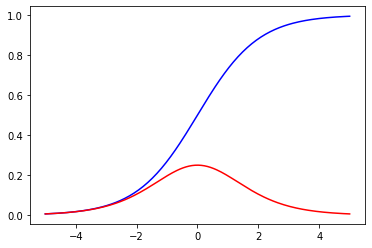

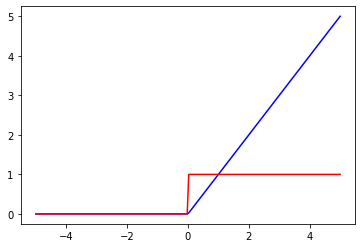

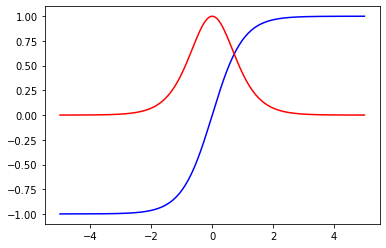

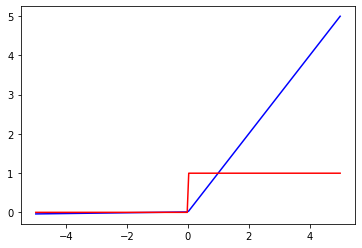

Layer 0 : 6 neurons 2 inputs
(6, 1) b = 
 [[ 0.24483649]
 [-0.7754932 ]
 [-0.03232769]
 [-0.88795025]
 [-0.9769471 ]
 [-0.84337337]]
(6, 2) W = 
 [[ 0.6302826  -0.39531321]
 [ 0.9487188  -0.77552493]
 [-0.72206034  0.24200691]
 [ 0.66596962 -0.2274969 ]
 [ 0.7424553   0.88424679]
 [ 0.52159036 -0.55089096]]
Layer 1 : 4 neurons 6 inputs
(4, 1) b = 
 [[ 0.45979297]
 [-0.1064213 ]
 [ 0.9639858 ]
 [-0.34977778]]
(4, 6) W = 
 [[-0.58312834  0.7724178  -0.47842877 -0.43202586 -0.544462   -0.26227478]
 [-0.13391034 -0.7259466   0.87675039  0.33306128  0.15010807 -0.95185938]
 [-0.10765051 -0.16162259  0.54635133  0.62268203 -0.58633544  0.16283952]
 [ 0.83005989 -0.03588739  0.45334222  0.01921561 -0.70490809 -0.84235331]]
Layer 2 : 1 neurons 4 inputs
(1, 1) b = 
 [[0.70302638]]
(1, 4) W = 
 [[ 0.19634999 -0.54594412  0.76157703 -0.83480218]]


In [7]:
# Sanity check
# sig = { 'fun': lambda z : 1 / (1 + np.exp(-z)), 'der' : lambda z : sig['fun'](z)*(1-sig['fun'](z)) }
sig = { 'fun': lambda z : 1 / (1 + np.exp(-z)), 'der' : lambda z : z*(1-z) }
relu = { 'fun': lambda z : np.maximum(0,z), 'der' : lambda z : np.heaviside(z, 0) }
tanh = { 'fun': lambda z : (2 / (1 + np.exp(-2*z)))-1, 'der' : lambda z : 1-z**2 }
leakyrelu = { 'fun': lambda z : np.maximum(0.01*z,z), 'der' : lambda z : np.heaviside(z, 0) - 0.01}

z = np.linspace(-5, 5, 200)

a = sig['fun'](z)
da = sig['der'](a)
plt.plot(z, a, c='blue')
plt.plot(z, da, c='red')
plt.show()

a = relu['fun'](z)
da = relu['der'](z)
plt.plot(z, a, c='blue')
plt.plot(z, da, c='red')
plt.show()

a = tanh['fun'](z)
da = tanh['der'](a)
plt.plot(z, a, c='blue')
plt.plot(z, da, c='red')
plt.show()

a = leakyrelu['fun'](z)
da = leakyrelu['der'](a)
plt.plot(z, a, c='blue')
plt.plot(z, da, c='red')
plt.show()

nn_neurons = [6, 4, 1]
nn_act = [tanh, tanh, tanh] 

nn = create_NN(features, nn_neurons, nn_act)

for l in range(len(nn)):
    print("Layer", l , ":", nn[l].w.shape[0], "neurons", nn[l].w.shape[1], 'inputs')
    print(nn[l].b.shape, 'b = \n', nn[l].b)
    print(nn[l].w.shape, 'W = \n', nn[l].w)


In [8]:
l2_cost = { 'fun': lambda yhat, y : np.mean((yhat - y) ** 2), 'der' : lambda yhat, y : (yhat - y) }
logistic_cost = { 'fun': lambda Yhat, Y : float(np.squeeze(-(1/Y.shape[1]) * ((np.log(Yhat) @ Y.T) + (np.log(1-Yhat) @ (1-Y).T)))), \
                  'der' : lambda Yhat, Y : (Yhat - Y) }

def forward_pass(nn, x):
    ''' Forward pass '''
  
    # Array of outputs in each layer
    z = []
    a = []
    for l in range(len(nn)):
        
        if l == 0:
            # First layer inputs = x
            z_layer = nn[0].w @ x + nn[0].b
        else:
            # for the rest, the input is the output from the previous layer
            z_layer = nn[l].w @ a[l-1] + nn[l].b
        
        # Activation function
        a_layer = nn[l].act['fun'](z_layer)
        
        z.append(z_layer)
        a.append(a_layer)
        
    return z, a

def predict(nn, x):
    '''Predicts a value'''
    return forward_pass(nn, x)[1][-1]
    
    
def train(nn, x, y, cost, lr=0.05):
    
    # Forward pass
    z_layers, a_layers = forward_pass(nn, x)

    deltas = []
    
    for l in reversed(range(len(nn))):
        z = z_layers[l]
        a = a_layers[l]
        if l == 0:
            a_1 = x
        else:
            a_1 = a_layers[l-1]
            
        if l == len(nn)-1:
            # Calculate delta for the last layer
            deltas.insert(0, cost['der'](a,y) * nn[l].act['der'](a))
        else:
            # Calculate delta for the rest of the layers
            deltas.insert(0, _w.T @ deltas[0] * nn[l].act['der'](a) )
                   
        _w = nn[l].w
        
        # gradient descent
        nn[l].b = nn[l].b - (np.mean(deltas[0], axis=1, keepdims=True) * lr)
        nn[l].w = nn[l].w - (deltas[0] @ a_1.T) * lr / (y.shape[1])
        
#         print(y.shape)
#         print(deltas[0].shape)
#         print(nn[l].w.shape, a_1.T.shape)
        
    return a_layers[-1] 
    
# train(nn, x_train, y_train, l2_cost, lr=0.05)

In [9]:
# Sanity check
z, y = forward_pass(nn, x_train) 
for l in range(len(nn)):
    print('Layer', l, '/ z:', z[l].shape, '/ y:' ,y[l].shape)

y = predict(nn, x_train)

print('Predicted values:', y.shape)

Layer 0 / z: (6, 500) / y: (6, 500)
Layer 1 / z: (4, 500) / y: (4, 500)
Layer 2 / z: (1, 500) / y: (1, 500)
Predicted values: (1, 500)


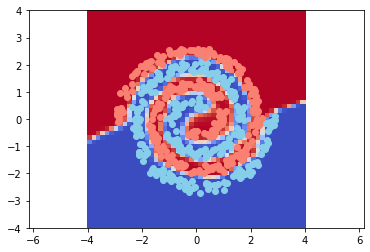

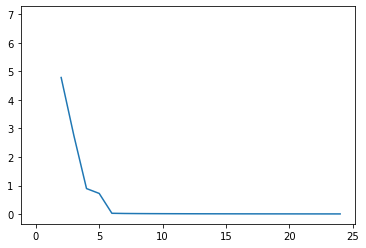

In [10]:
import time
from IPython.display import clear_output

features = 2
samples = 500

# X, Y = make_circles(n_samples = samples, factor = 0.5, noise = 0.07)
# X, Y = make_moons(n_samples = samples, noise=0.2, random_state=0)
# X, Y = flower_dataset(samples, 2)
X, Y = spiral_dataset(samples)

# prepare the samples set and Y set
x_train = X.T
# x_train = np.vstack((x_train, x_train**2))
y_train = Y.reshape(1, samples)

nn_neurons = [50,50,50,1]
activ = relu
nn_act = [tanh, activ, activ, sig ] 

nn = create_NN(features, nn_neurons, nn_act)

loss = []

for i in range(2500):
    
    yhat = train(nn, x_train, y_train, logistic_cost, 1)
    
    if i % 100 == 0:
        loss.append(logistic_cost['fun'](yhat, y_train))
        
        res = 50
        tam = 4
        _x0 = np.linspace(-tam, tam, res)
        _x1 = np.linspace(-tam, tam, res)
        
        _y = np.zeros((res,res))
        
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _y[i0, i1] = predict(nn, np.array([[x1], [x0]]))
        
        plt.pcolormesh(_x0, _x1, _y, cmap="coolwarm")
        plt.axis("equal")
        
        plt.scatter(X[Y==0,0], X[Y==0,1], c='skyblue')
        plt.scatter(X[Y==1,0], X[Y==1,1], c='salmon')
        
        clear_output(wait=True)
        plt.show()
        
        plt.plot(range(len(loss)), loss)
        plt.show()
        
#         time.sleep(0.05)